<a href="https://colab.research.google.com/github/BenjaminVegaM/ADA-Informes/blob/main/Informe_BellmanFord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema Camino más corto con fuente única (arcos positivos)

**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $scr\in V$, y un valor real $w_e$ que representa el peso o valor asociado a cada arco $e\in E$.

**Salida**: Una de las siguientes opciones:

1. La distancia más corta $dist(s,v)$ para cada vértice $v\in V$.
2. Una declaración indicando que $G$ contiene un ciclo negativo.

El algoritmo de Bellman-Ford resuelve el problema del camino más corto de una sola fuente en grafos con longitudes de arcos negativos en el sentido de que o bien calcula las distancias correctas del camino más corto o bien determina correctamente que el grafo de entrada tiene un ciclo negativo.

Este algoritmo utiliza el paradigma de programación dinámica con un acercamiento bottom-up.

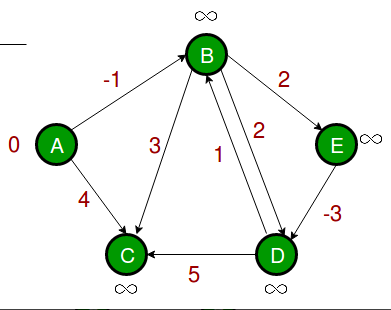

# 2. Algoritmo de Bellman-Ford

El siguiente código muestra una implementación del **Algoritmo de Bellman-Ford**.

## 2.1 Código del Algoritmo de Bellman-Ford

In [53]:
def BellmanFord(G, vertices, src, verbose = False, visualize = False):

    if visualize == True: mostrarGrafo(G, vertices)
    dist = [float("Inf")] * vertices
    dist[src] = 0

    if verbose == True: print("Arreglo de Distancias al inicio")
    if verbose == True: print(dist)

    x = 0
    while (x < vertices - 1):
        if verbose == True: print("\n   > Iteración", x)
        for u, v, w in G:
            if verbose == True: print("\nArco actual")
            if verbose == True: print("(",u,",",v,",",w,")")
            
            if verbose == True: print("\nVerificando que dist[u] no es infinito")
            if verbose == True: print("dist[",u,"] =",dist[u])
            if verbose == True: print("y que su suma con el peso es menor a la distancia directa dist[v]")
            if verbose == True: print("dist[",v,"] =",dist[v])
            if dist[u] != float("Inf") and dist[u] + w < dist[v]:
                if verbose == True: print("Suma es menor")
                dist[v] = dist[u] + w
                if verbose == True: print("Distancia hacia v ahora es la suma.")
            else:
                if verbose == True: print("\nNo es menor, se mantiene.")

            if verbose == True: print("Arreglo de Distancias Actual")
            if verbose == True: print(dist)
        x += 1

    if verbose == True: print("\nBuscando Ciclos Negativos Infinitos")
    for u, v, w in G:
        if dist[u] != float("Inf") and dist[u] + w < dist[v]:
            if verbose == True: print("Hay un ciclo infinito!")
            return False

    if verbose == True: print("\nRetornando las distancias")
    return dist

In [55]:
# Ejemplo
grafo1 = []
vertices1 = 5
AnyadirArco(grafo1, 0, 1, -1)
AnyadirArco(grafo1, 0, 2, 4)
AnyadirArco(grafo1, 1, 2, 3)
AnyadirArco(grafo1, 1, 3, 2)
AnyadirArco(grafo1, 1, 4, 2)
AnyadirArco(grafo1, 3, 1, 1)
AnyadirArco(grafo1, 3, 2, 5)
AnyadirArco(grafo1, 4, 3, -3)

print("Entrada:")
ImprimirGrafo(grafo1)
dist1 = BellmanFord(grafo1, vertices1, 0)
print("\nSalida:")
if (dist1 == False): print("El grafo tiene un ciclo negativo!")
else: ImprimirGrafoDistancias(grafo1, vertices1, dist1)

Entrada:
Nodo ---(costo)--> Nodo
0 ---( -1 )--> 1
0 ---( 4 )--> 2
1 ---( 3 )--> 2
1 ---( 2 )--> 3
1 ---( 2 )--> 4
3 ---( 1 )--> 1
3 ---( 5 )--> 2
4 ---( -3 )--> 3

Salida:
Distancia desde el nodo fuente hasta todos los nodos:
0 :  0
1 :  -1
2 :  2
3 :  -2
4 :  1


In [56]:
# Ejemplo
grafo2 = []
vertices2 = 4
AnyadirArco(grafo2, 0, 1, -1)
AnyadirArco(grafo2, 0, 2, 2)
AnyadirArco(grafo2, 1, 2, -4)
AnyadirArco(grafo2, 1, 3, 2)
AnyadirArco(grafo2, 2, 0, -1)
AnyadirArco(grafo2, 3, 1, 1)
AnyadirArco(grafo2, 3, 2, 5)

print("Entrada:")
ImprimirGrafo(grafo2)
dist2 = BellmanFord(grafo2, vertices2, 0)
print("\nSalida:")
if (dist2 == False): print("El grafo tiene un ciclo negativo!")
else: ImprimirGrafoDistancias(grafo2, vertices2, dist2)

Entrada:
Nodo ---(costo)--> Nodo
0 ---( -1 )--> 1
0 ---( 2 )--> 2
1 ---( -4 )--> 2
1 ---( 2 )--> 3
2 ---( -1 )--> 0
3 ---( 1 )--> 1
3 ---( 5 )--> 2

Salida:
El grafo tiene un ciclo negativo!


## 2.2. Descripción del algoritmo

El **Algoritmo de Bellman-Ford** calcula todos los posibles caminos desde un nodo inicial hasta todos los nodos del grafo y retorna todos los caminos óptimos, o advierte en caso de existir un ciclo infinito negativo.

Para ello recibe como entrada un grafo de $v$ vertices y el nodo del que se quiere empezar.

1. Primero crea una matriz auxiliar en la que se almacenarán las distancias óptimas.

2. Calcula la distancia óptima para cada camino desde el nodo inicial hasta un nodo $k$ y guarda el valor mínimo entre la distancia directa o el camino óptimo anterior más el actual.

3. Guarda el resultado en la matriz y continúa iterando hasta revisar todos los vertices.

4. Luego verifica si existen ciclos infinitos, de ser así retorna false.

5. Si no hay ciclos negativos, retorna el costo de todas las distancias más cortas desde el nodo fuente.

> Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa a medida que se ejecuta el código dentro de la función.

## 2.3. Ejemplo

Consideremos, por ejemplo, el grafo:

$G:$

Nodo --(costo)-> Nodo

$(0)$ -[$-1$]-> $(1)$

$(0)$ ---[$4$]--> $(2)$

$(1)$ ---[$3$]--> $(2)$

$(1)$ ---[$2$]--> $(3)$

$(1)$ ---[$2$]--> $(4)$

$(3)$ ---[$1$]--> $(1)$

$(3)$ ---[$5$]--> $(2)$

$(4)$ -[$-3$]-> $(3)$

Y se quiere empezar desde el nodo $2$.

Primero crea la matriz auxiliar de dimensiones $V*V$ donde $V$ es el número de nodos.

Luego comienza a calcular la distancia desde el nodo $0$ hasta el nodo $1$, para ello toma el valor mínimo entre el costo directo ($-1$) y el anterior, sin embargo como no hay un anterior calculado se queda el directo.

Luego calcula a distancia desde el nodo $0$ hasta el nodo $2$, al igual que antes no hay un camino diferente por lo que se queda el valor directo ($4$).

Después como el nodo $0$ no tiene más arcos hacia otros nodos se pasa al nodo $1$.

Al igual que con el nodo $0$ se calcula la distancia desde $1$ hasta $2$ y se obtiene que el camino desde $0$ hasta $2$ es de $4$ y el de $1$ hasta $0$ no existe por lo que no se puede y se mantiene el camino directo ($3$).

Se hace lo mismo con el arco desde $1$ hasta $4$.

Así continúa el algoritmo hasta que en el arco desde $3$ hasta $2$ sucede algo diferente:

Aquí se ve que el camino desde $1$ hasta $2$ es de $3$ y el de $3$ hasta $1$ es $1$, lo que junto da $4$, lo cual es menor que el camino directo desde $3$ hasta $2$ que es de $5$, por lo que se guarda la combinación de caminos envez del camino directo.

Luego el algoritmo continúa igual para el resto de nodos y arcos hasta finalizar con todos.

Despues de esto comprueba si existen ciclos infinitos, esto viendo si aún existen arcos con un valor infinito. Si existe alguno retorna "False", finalizando.

De lo contrario retorna las distancias calculadas y finaliza el algoritmo.

## 2.4. Ejecución del Algoritmo Paso a Paso (verbose = True)

Al utilizar la opción `verbose=True` se puede ver paso a paso lo que le ocurre al arreglo en cada iteración del algoritmo.

In [ ]:
# Ejemplo
grafo3 = []
vertices3 = 5
AnyadirArco(grafo3, 0, 1, -1)
AnyadirArco(grafo3, 0, 2, 4)
AnyadirArco(grafo3, 1, 2, 3)
AnyadirArco(grafo3, 1, 3, 2)
AnyadirArco(grafo3, 1, 4, 2)
AnyadirArco(grafo3, 3, 1, 1)
AnyadirArco(grafo3, 3, 2, 5)
AnyadirArco(grafo3, 4, 3, -3)

print("Entrada:")
ImprimirGrafo(grafo3)
dist3 = BellmanFord(grafo3, vertices3, 0, True)
print("\nSalida:")
if (dist3 == False): print("El grafo tiene un ciclo negativo!")
else: ImprimirGrafoDistancias(grafo3, vertices3, dist3)

## 2.5. Ejecución del Algoritmo Paso a Paso con Imagen del Grafo (visualize = True)

Al utilizar la opción `visualize=True` se puede ver el grafo en una imagen, con todos sus nodos y los arcos de estos junto con su valor.

Entrada:
Nodo ---(costo)--> Nodo
0 ---( -1 )--> 1
0 ---( 4 )--> 2
1 ---( 3 )--> 2
1 ---( 2 )--> 3
1 ---( 2 )--> 4
3 ---( 1 )--> 1
3 ---( 5 )--> 2
4 ---( -3 )--> 3

Salida:
Distancia desde el nodo fuente hasta todos los nodos:
0 :  0
1 :  -1
2 :  2
3 :  -2
4 :  1


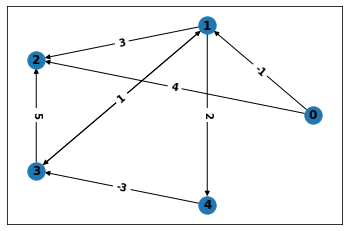

In [57]:
# Ejemplo
grafo4 = []
vertices4 = 5
AnyadirArco(grafo4, 0, 1, -1)
AnyadirArco(grafo4, 0, 2, 4)
AnyadirArco(grafo4, 1, 2, 3)
AnyadirArco(grafo4, 1, 3, 2)
AnyadirArco(grafo4, 1, 4, 2)
AnyadirArco(grafo4, 3, 1, 1)
AnyadirArco(grafo4, 3, 2, 5)
AnyadirArco(grafo4, 4, 3, -3)

print("Entrada:")
ImprimirGrafo(grafo4)
dist4 = BellmanFord(grafo4, vertices4, 0, False, True)
print("\nSalida:")
if (dist4 == False): print("El grafo tiene un ciclo negativo!")
else: ImprimirGrafoDistancias(grafo4, vertices4, dist4)

# 3. Algoritmo de Dijkstra

El siguiente código muestra una implementación del **Algoritmo de Dijkstra**.

## 3.1. Código del Algoritmo de Dijkstra

In [98]:
def Dijkstra(G, vertices, src, verbose = False, visualize = False):
    if visualize == True: mostrarGrafo(G, vertices)
    dist = [float("Inf")] * vertices
    dist[src] = 0
    sptSet = [False] * vertices

    for cout in range(vertices):
        min = float("Inf")
        aux = -1
        for k in range(vertices):
            if dist[k] < min and sptSet[k] == False:
                min = dist[k]
                aux = k

        sptSet[aux] = True

        for u, v, w in G:
            if u == aux:
                if w > 0 and sptSet[v] == False and dist[v] > dist[u] + w:
                    dist[v] = dist[u] + w
    
    return dist

In [105]:
# Ejemplo
grafo5 = []
vertices5 = 4
AnyadirArco(grafo5, 0, 1, 11)
AnyadirArco(grafo5, 0, 2, 2)
AnyadirArco(grafo5, 1, 0, 7)
AnyadirArco(grafo5, 1, 2, 4)
AnyadirArco(grafo5, 2, 3, 5)
AnyadirArco(grafo5, 3, 1, 1)

print("Entrada:")
ImprimirGrafo(grafo5)
dist5 = Dijkstra(grafo5, vertices5, 2)
print("\nSalida:")
ImprimirGrafoDistancias(grafo5, vertices5, dist5)

Entrada:
Nodo ---(costo)--> Nodo
0 ---( 11 )--> 1
0 ---( 2 )--> 2
1 ---( 7 )--> 0
1 ---( 4 )--> 2
2 ---( 5 )--> 3
3 ---( 1 )--> 1

Salida:
Distancia desde el nodo fuente hasta todos los nodos:
0 :  13
1 :  6
2 :  0
3 :  5


## 3.2. Descripción del algoritmo

El **Algoritmo de Dijkstra** calcula todos los posibles caminos desde un nodo inicial hasta todos los nodos del grafo y retorna todos los caminos óptimos. Este algoritmo a diferencia del algoritmo de Bellman-Ford solo funciona si los arcos son positivos.

Para ello revisa el nodo fuente y busca el arco con menor costo, entonces va hacia él y marca al anterior como buscado, luego de los nodos alcanzables por los nodos buscados va hacia el de menor costo de ese y repite el proceso hasta haber buscado todos los nodos, entonces retorna una lista del costo del camino menor desde el nodo fuente hasta los otros nodos.

> Cuando la variable `verbose` es `True` se muestra información para ver lo que pasa a medida que se ejecuta el código dentro de la función.

## 3.3. Ejecución del Algoritmo Paso a Paso (verbose = True)

Al utilizar la opción `verbose=True` se puede ver paso a paso lo que le ocurre al arreglo en cada iteración del algoritmo.

In [94]:
# Ejemplo
grafo6 = []
vertices6 = 4
AnyadirArco(grafo6, 0, 1, 11)
AnyadirArco(grafo6, 0, 2, 2)
AnyadirArco(grafo6, 1, 0, 7)
AnyadirArco(grafo6, 1, 2, 4)
AnyadirArco(grafo6, 2, 3, 5)
AnyadirArco(grafo6, 3, 1, 1)

print("Entrada:")
ImprimirGrafo(grafo6)
dist6 = Dijkstra(grafo6, vertices6, 2, True)
print("\nSalida:")
ImprimirGrafoDistancias(grafo6, vertices6, dist6)

Entrada:
Nodo ---(costo)--> Nodo
0 ---( 11 )--> 1
0 ---( 2 )--> 2
1 ---( 7 )--> 0
1 ---( 4 )--> 2
2 ---( 5 )--> 3
3 ---( 1 )--> 1

Salida:
Distancia desde el nodo fuente hasta todos los nodos:
0 :  13
1 :  6
2 :  0
3 :  5


Entrada:
Nodo ---(costo)--> Nodo
0 ---( 11 )--> 1
0 ---( 2 )--> 2
1 ---( 7 )--> 0
1 ---( 4 )--> 2
2 ---( 5 )--> 3
3 ---( 1 )--> 1

Salida:
Distancia desde el nodo fuente hasta todos los nodos:
0 :  13
1 :  6
2 :  0
3 :  5


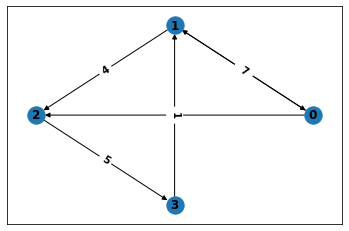

In [95]:
# Ejemplo
grafo7 = []
vertices7 = 4
AnyadirArco(grafo7, 0, 1, 11)
AnyadirArco(grafo7, 0, 2, 2)
AnyadirArco(grafo7, 1, 0, 7)
AnyadirArco(grafo7, 1, 2, 4)
AnyadirArco(grafo7, 2, 3, 5)
AnyadirArco(grafo7, 3, 1, 1)

print("Entrada:")
ImprimirGrafo(grafo7)
dist7 = Dijkstra(grafo7, vertices7, 2, False, True)
print("\nSalida:")
ImprimirGrafoDistancias(grafo7, vertices7, dist7)

# 4. Tiempo de ejecución

## 4.1. Algoritmo BellmanFord

### 4.1.1. Fórmula de recurrencia

La fórmula de recurrencia **T(v)** donde $v$ es el número de vértices o nodos, del algoritmo se obtiene analizando sus partes.

Para el caso base $v \leq 1$ el grafo solo tiene un nodo, por lo cual no puede tener arcos, en cuyo caso no existe un camino más corto, por ello tiene un tiempo de ejecución de $O(1)$.

Para el resto de casos se tiene:

- Un ciclo while que itera $v-1$ veces, por ello tiene un tiempo de ejecución de $O(v)$.

    - Dentro hay un ciclo for que itera una vez por cada arco del grafo. Como a lo más pueden haber $v-1$ arcos por nodo, esto tiene un tiempo de ejecución de $O(v^2)$.

Juntando las partes se tiene que

$T(v) = O(v) * O(v^2)$

$T(v) = O(v^3)$

Por lo cual la complejidad temporal del algoritmo es $O(v^3)$.

## 4.2. Algoritmo de Dijsktra

### 4.2.1. Fórmula de recurrencia

La fórmula de recurrencia **T(v)** donde $v$ es el número de vértices o nodos, del algoritmo se obtiene analizando sus partes.

Para el caso base $v \leq 1$ el grafo solo tiene un nodo, por lo cual no puede tener arcos, en cuyo caso no existe un camino más corto, por ello tiene un tiempo de ejecución de $O(1)$.

Para el resto de casos se tiene:

- Un ciclo while que itera $v$ veces, por ello tiene un tiempo de ejecución de $O(v)$.

    - Dentro hay:
        - un ciclo for que itera $v$ veces para encontrar el arco con menor peso, también con un tiempo de ejecución de $O(v)$.
        - otro ciclo for que itera una vez por cada arco del grafo, representado por $e$, por lo que se tiene $O(e)$.

Juntando las partes se tiene que

$T(v) = O(v) * (O(v) + O(e))$

$T(v) = O(v^2) + O(v*e)$

Como a lo más hay $v^2$ arcos:

$T(v) = O(v^2) + O(v^3)$

Por lo cual la complejidad temporal del algoritmo es $O(v^2 + v^3)$ para esta implementación, sin embargo existen otros métodos para encontrar el arco menor, por lo que se podría optimizar hasta un tiempo de ejecución de $O(v^2)$ o incluso $O(e + v*log (v))$.

# 5. Complejidad espacial

Ambos algoritmos crean un arreglo de $(e)$ elementos donde $e$ es el número de arcos del grafo, este arreglo almacena los caminos menores desde el nodo $src$ hasta cada uno de los otros nodos, por ello la complejidad espacial del algoritmo es de $O(e)$, sin embargo como a lo más el grafo va a tener $v-1$ arcos donde $v$ es el número de nodos, la complejidad espacial de ambos algoritmos es $O(v)$.

# 6. Correctitud 

## 6.1. Teorema (Correctitud del Algoritmo de Bellman-Ford)

El algoritmo Bellman-Ford retorna un arreglo con la distancia más corta desde un nodo hacia el resto. En caso de que haya un ciclo infinito retorna False.

## 6.2. Prueba del Teorema por medio de Inducción


### Hipótesis

Luego de $i$ repeticiones del ciclo for
- Si la dist($u$) no es infinito, es igual a la longitud de algún camino desde $s$ hasta $u$.
- Si hay un camino que va de $s$ hasta $u$ con, a lo más, $i$ arcos, entonces la dist($u$) es a lo más la longitud del camino más corto desde $s$ hasta $u$, con a lo más $i$ arcos.

### Caso base ($i = 0$)

El único nodo separado por $0$ arcos del nodo origen $s$ es el mismo nodo $s$, por lo tanto se cumple la hipótesis para este caso.

### Caso inductivo

Al comienzo de la iteración $i$, por inducción, sabemos que antes la distancia actual de $u$ a un nodo $v$, corresponde a la distancia del camino más corto pasando a lo más por $i - 1$ arcos, pero ahora estaríamos considerando la posibilidad de que exista un camino, que contenga un arco adicional, y que minimize esta distancia. Por lo que tendríamos dos casos:
- El camino más corto de $u$ a $v$ está formado por $i - 1$ arcos o menos. En este caso, ningún camino de $u$ a $v$ formado por $i$ arcos minimizaría la distancia, por lo que se mantendría el valor de la iteración anterior.
- El camino más corto de $u$ a $v$ está formado por $i - 1$ arcos o menos más el arco hasta $v$. En este caso, consideraremos un nodo predecesor a $v$ llamado $k$, de forma que el camino que une a estos dos nodos está formado por $i - 1$ arcos o menos. Por inducción sabemos que la distancia al nodo $k$ es óptima, luego al sumar este valor con el peso del arco $(k,v)$ se obtendrá una nueva distancia para $v$.

Como en cada iteración se recorren todos los arcos del grafo, al final se tendrá la distancia desde el nodo de origen hasta todos los otros nodos y esta será la menor posible.

# 7. Experimentos

In [134]:
# Funciones varias, principalmente utilizadas en verbose y experimentos
import networkx as nx

def AnyadirArco(grafo, u, v, w):
	grafo.append([u, v, w])

def ImprimirGrafoDistancias(grafo, vertices, dist):
    print("Distancia desde el nodo fuente hasta todos los nodos:")
    for i in range(vertices):
            print(i,": ", dist[i])

def ImprimirGrafo(grafo):
    print("Nodo ---(costo)--> Nodo")
    for u, v, w in grafo:
            print(u,"---(",w,")-->",v)

import random

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

def instance_generator2(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(1, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(1, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

def mostrarGrafo(G, v):
    labels = nx.get_edge_attributes(graph_to_nxdigraph(G,v),'weight')
    nx.draw_networkx(graph_to_nxdigraph(G,v), pos= nx.circular_layout(graph_to_nxdigraph(G,v)), with_labels = True, font_weight = 'bold')
    nx.draw_networkx_edge_labels(graph_to_nxdigraph(G,v), pos=nx.circular_layout(graph_to_nxdigraph(G,v)),edge_labels = labels,font_weight='bold')

## 7.1. Tiempo de ejecución experimental

El siguiente gráfico muestra el comportamiento del tiempo de ejecución del **Algoritmo de Bellman-Ford** en relación a la cantidad de nodos $n \in [3,50]$ para $25$ grafos generados aleatoriamente.

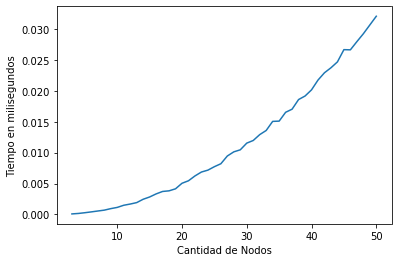

In [125]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

x = []
y = []

for n in range(3,51):
    x.append(n)
    tTotal = 0
    for i in range(25):
        grafo, m = instance_generator(n)
        t = repeat(setup="from __main__ import BellmanFord", stmt=f"BellmanFord({grafo}, {n}, {m})", repeat=1, number=10)
        for k in t:
            tTotal += k
    tTotal /= 25
    y.append(tTotal)

plt.plot(x,y)

plt.xlabel('Cantidad de Nodos')
plt.ylabel('Tiempo en milisegundos')
plt.show()

### Análisis del gráfico

Del gráfico se puede ver que como era de esperarse el algoritmo se comporta de forma exponencial, con cierta vibración debido a que los grafos generados podían tener más o menos arcos, y el algoritmo recorre cada arco por lo que con menos arcos el algoritmo tardaría menos.

# 7.2. Analisis Elemento con mayor probabilidad como raiz

El siguiente gráfico muestra una comparación entre los tiempos de ejecución de los algoritmos de **Bellman-Ford** y **Dijsktra**.


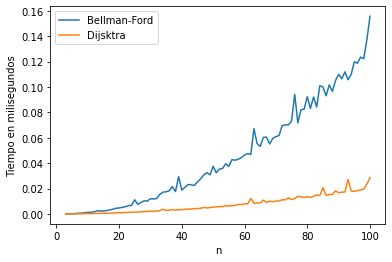

In [135]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

x = []
yB = []
yD = []
graph = nx.Graph()

for n in range(3,101):
  grafo, m = instance_generator2(n)
  x.append(n)
  t = repeat(setup="from __main__ import BellmanFord", stmt=f"BellmanFord({grafo}, {n}, {m})", repeat=1, number=10)
  yB.append(t)
  t = repeat(setup="from __main__ import Dijkstra", stmt=f"Dijkstra({grafo}, {n}, {m})", repeat=1, number=10)
  yD.append(t)

plt.plot(x,yB)
plt.plot(x,yD)
plt.legend(["Bellman-Ford", "Dijsktra"])

plt.xlabel('n')
plt.ylabel('Tiempo en milisegundos')
plt.show()

### Analisis del gráfico

En el gráfico se observa que el **Algoritmo de Dijsktra** es muchísimo más rápido que el **Algoritmo de Bellman-Ford**, especialmente para grafos con muchos nodos, por ello es claramente mejor utilizar el **Algoritmo de Dijsktra** siempre y cuando los arcos tengan valores únicamente positivos, de lo contrario el algoritmo no retornará valores correctos, en cuyo caso habría que usar el **Algoritmo de Bellman-Ford** ya que ese si permite arcos negativos.